<a href="https://colab.research.google.com/github/bhanu608/FMML/blob/main/module1/M1L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## Standard Imports.

! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams 
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=7c144e73d91db19d8da002c83c4a524ddd8e07e4c0f15e9839f8a61f1c7143a0
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


# 1.Try with different languages.

# 2.The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

In [ ]:
## set language and then download the data.

topic1 = 'Giraffe'
topic2 = 'Tiger'
wikipedia.set_lang('en') 
eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content
wikipedia.set_lang('te')
tel1 = wikipedia.page(topic1).content
tel2 = wikipedia.page(topic2).content

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters, i.e. if not a-z then replace with space.
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
tel1 = cleanup(tel1)
tel2 = cleanup(tel2)

In [ ]:
## Dont worry if you do not understand these functions right away, you can revisit them and follow step-by-step.

# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys()) 
  values = list(ngram.values())
  
  # sort the keys in alphabetic order
  combined = zip(keys, values) ## keys i.e. characters on x axis and their count in the given doc as values.
  zipped_sorted = sorted(combined, key=lambda x: x[0]) ## sorting based on keys, to get a to z order.
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

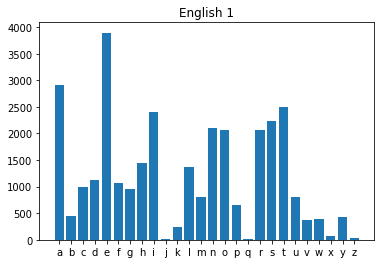

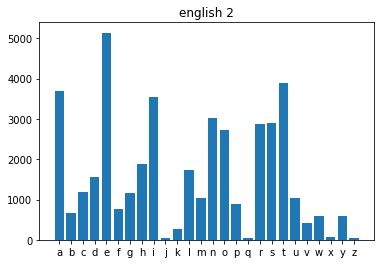

In [ ]:
## we passed ngrams 'n' as 1 to get unigrams. Unigram is nothing but single token (in this case character).
## ngrams imported from nltk, it returns ngrams from given string. Counter returns dictionary with keys as elements and counts as values.
unigram_eng1 = Counter(ngrams(eng1,1)) ##just to get count of each element. 
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('english 2')
plt.show()

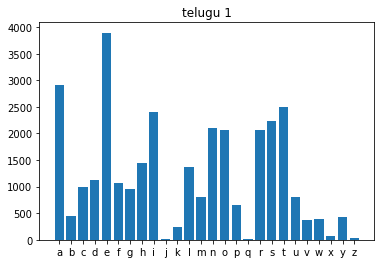

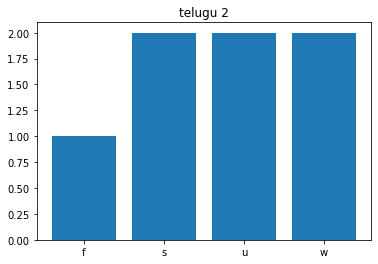

In [ ]:
unigram_tel1 = Counter(ngrams(tel1,1))
plothistogram(unigram_eng1)
plt.title('telugu 1')
plt.show()
unigram_tel2 = Counter(ngrams(tel2,1))
plothistogram(unigram_tel2)
plt.title('telugu 2')
plt.show()

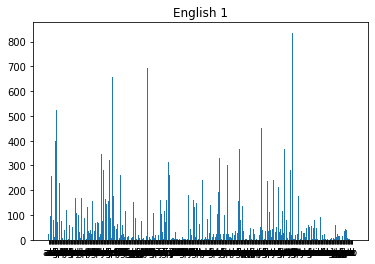

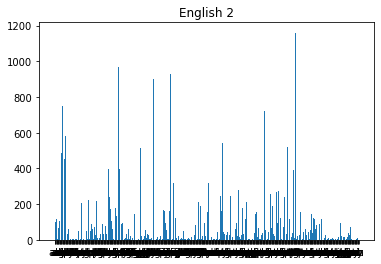

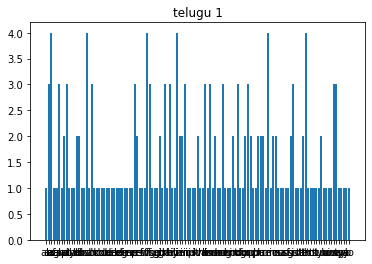

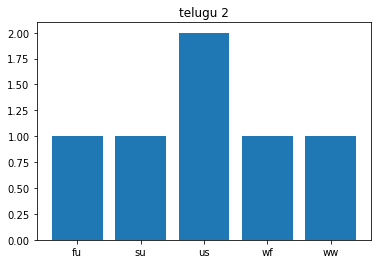

In [ ]:
## Now instead of unigram, we will use bigrams as features, and see how useful bigrams are as features.

bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_tel1 = Counter(ngrams(tel1,2))
plothistogram(bigram_tel1)
plt.title('telugu 1')
plt.show()

bigram_tel2 = Counter(ngrams(tel2,2))
plothistogram(bigram_tel2)
plt.title('telugu 2')
plt.show()

In [ ]:
bigram_eng1

Counter({('t', 'h'): 836,
         ('h', 'e'): 694,
         ('e', 'g'): 164,
         ('g', 'i'): 279,
         ('i', 'r'): 315,
         ('r', 'a'): 441,
         ('a', 'f'): 258,
         ('f', 'f'): 262,
         ('f', 'e'): 286,
         ('e', 'i'): 145,
         ('i', 's'): 212,
         ('s', 'a'): 240,
         ('a', 'l'): 398,
         ('l', 'a'): 180,
         ('a', 'r'): 323,
         ('r', 'g'): 39,
         ('g', 'e'): 151,
         ('e', 'a'): 347,
         ('f', 'r'): 77,
         ('r', 'i'): 161,
         ('i', 'c'): 161,
         ('c', 'a'): 168,
         ('a', 'n'): 523,
         ('n', 'h'): 25,
         ('h', 'o'): 110,
         ('o', 'o'): 58,
         ('o', 'f'): 194,
         ('e', 'd'): 280,
         ('d', 'm'): 35,
         ('m', 'a'): 243,
         ('a', 'm'): 77,
         ('m', 'm'): 29,
         ('l', 'b'): 11,
         ('b', 'e'): 121,
         ('e', 'l'): 155,
         ('l', 'o'): 147,
         ('o', 'n'): 368,
         ('n', 'g'): 329,
         ('i', 'n'):

In [ ]:
## a function to plot 2-D histogram. The values are color mapped. 

def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] #ord converts char to code
  plt.imshow(freq, cmap = 'jet')
  plt.colorbar()
  return freq

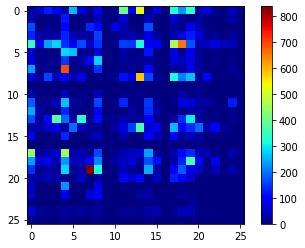

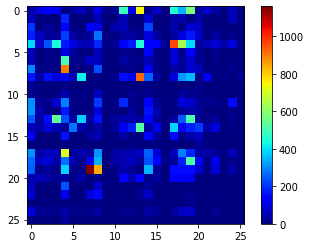

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

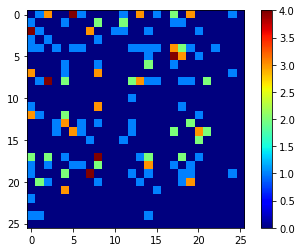

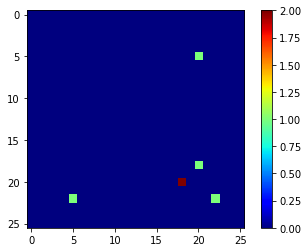

In [ ]:
bitel1 = plotbihistogram(bigram_tel1)
plt.show()
bitel2 = plotbihistogram(bigram_tel2)

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nTelugu 1:')
ShowTopN(bitel1)
print('\nTelugu 2:')
ShowTopN(bitel2)


English 1:
('t', 'h') : 836.0
('h', 'e') : 694.0
('e', 's') : 659.0
('i', 'n') : 587.0
('a', 'n') : 523.0
('e', 'r') : 467.0
('r', 'e') : 450.0
('r', 'a') : 441.0
('a', 'l') : 398.0
('n', 'd') : 384.0

English 2:
('t', 'h') : 1160.0
('e', 'r') : 967.0
('i', 'n') : 928.0
('h', 'e') : 901.0
('t', 'i') : 840.0
('a', 'n') : 750.0
('r', 'e') : 722.0
('e', 's') : 646.0
('a', 't') : 582.0
('n', 'd') : 543.0

Telugu 1:
('t', 'h') : 4.0
('a', 'f') : 4.0
('f', 'r') : 4.0
('c', 'a') : 4.0
('r', 'i') : 4.0
('i', 'c') : 4.0
('h', 'a') : 3.0
('l', 'i') : 3.0
('n', 'e') : 3.0
('m', 'a') : 3.0

Telugu 2:
('u', 's') : 2.0
('w', 'w') : 1.0
('f', 'u') : 1.0
('s', 'u') : 1.0
('w', 'f') : 1.0
('a', 'a') : 0.0
('r', 'd') : 0.0
('r', 'e') : 0.0
('r', 'f') : 0.0
('r', 'g') : 0.0


 # 3.How can we use and visualize trigrams and higher n-grams?

# => we can visualize trigrams using bar graphs

In [ ]:
def tuple2string(tuple):
  st = ''
  for ii in tuple:
    st = st + ii
  return st

def key2string(keys):
  return [tuple2string(i) for i in keys]

def key_value_pairs(ngram):
  keys = key2string(ngram.keys())
  values = list (ngram.values())
  return keys, values

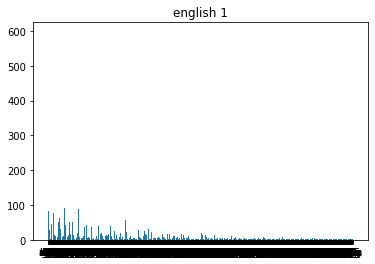

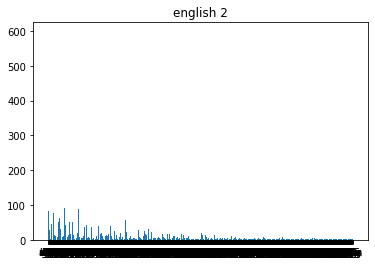

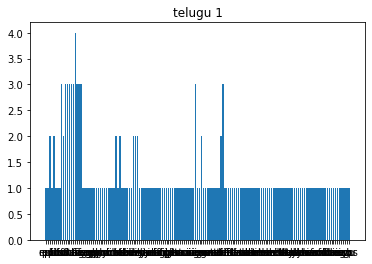

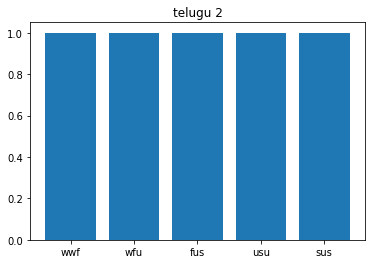

In [ ]:
trigram_eng1 = Counter(ngrams(eng1,3))
keys1,values1=key_value_pairs(trigram_eng1)
plt.bar(keys1,values1)
plt.title("english 1")
plt.show()

trigram_eng1 = Counter(ngrams(eng1,3))
keys2,values2=key_value_pairs(trigram_eng1)
plt.bar(keys2,values2)
plt.title("english 2")
plt.show()

trigram_tel1 = Counter(ngrams(tel1,3))
keys3,values3=key_value_pairs(trigram_tel1)
plt.bar(keys3,values3)
plt.title("telugu 1")
plt.show()

trigram_tel2 = Counter(ngrams(tel2,3))
keys4,values4=key_value_pairs(trigram_tel2)
plt.bar(keys4,values4)
plt.title("telugu 2")
plt.show()

# Part 2: Written numbers

In [ ]:
from keras.datasets import mnist
 
#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
no1 = train_X[train_y==1,:,:] ## dataset corresponding to number = 1.
no0 = train_X[train_y==0,:,:] ## dataset corresponding to number = 0.

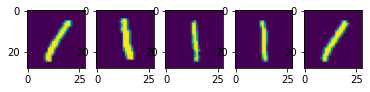

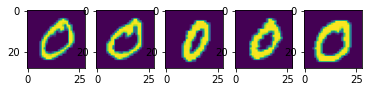

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

In [ ]:
a = no1>0
a.shape, no1.shape

((6742, 28, 28), (6742, 28, 28))

In [ ]:
## to help you understand how the np.sum is working to find count of pixels that are not zero.

mtx = np.arange(8).reshape(2,2,2)
a = mtx>1
a[0][0][0]
type(a[0][0][0])


numpy.bool_

In [ ]:
## sum of pixel values.

sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

In [ ]:
sum1.shape

(6742,)

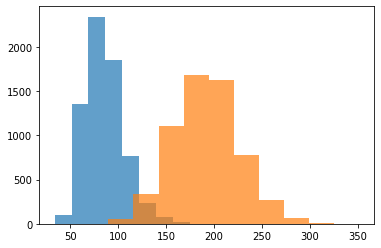

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  #print(img2)
  img2 = img2>0
  #print(img2)
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

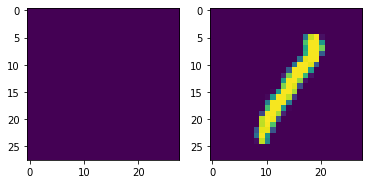

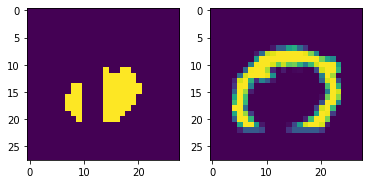

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

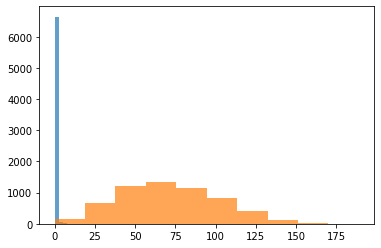

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
  
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

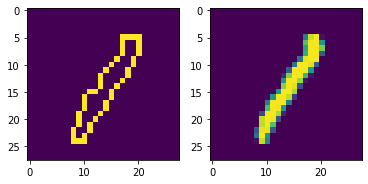

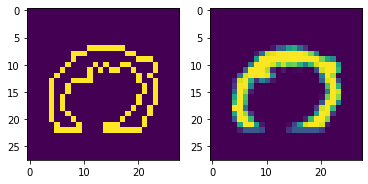

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

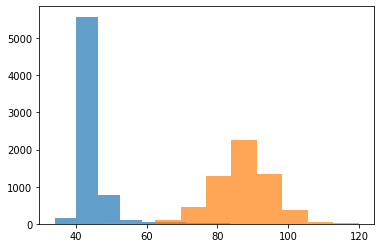

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

# What will happen if we plot two features together?

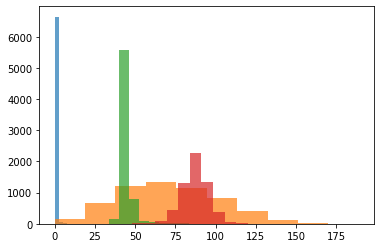

In [ ]:
#feature one
#sum1
#sum0
# feature two
plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
# feature three
plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

# 1.Which is the best combination of features?

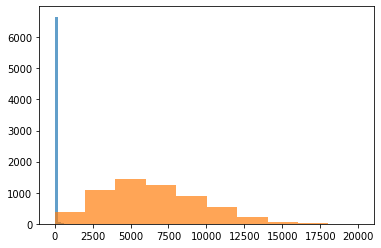

In [ ]:
new1 = hole1*bound1
new0 = hole0*bound0
plt.hist(new1,  alpha=0.7);
plt.hist(new0, alpha=0.7);

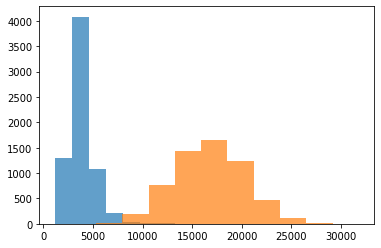

In [ ]:
new1 = sum1 * bound1
new0 = sum0 * bound0
plt.hist(new1, alpha=0.7);
plt.hist(new0, alpha=0.7);

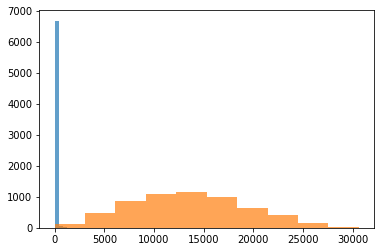

In [ ]:
new1 = sum1*hole1
new0 = sum0*hole0
plt.hist(new1, alpha=0.7);
plt.hist(new0, alpha=0.7);

**Hence combination of sum and hole and hole and bound features results best features** 

# 2.How would you test or visualize four or more features?

## => With the help of scatter plots we can visualize four or more features

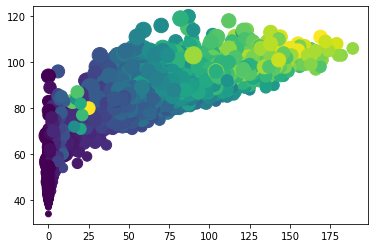

In [ ]:
plt.scatter(hole0,bound0,sum0,new0)
plt.scatter(hole1,bound1,sum1,new1)

# 3.Can you come up with your own features?

## => instead of summation of pixels i take average of pixel values to distinguish zero and one

In [ ]:
## average of pixel values
avg1 = np.average(no0>0, (1,2))
avg0 = np.average(no1>0, (1,2))

(array([9.700e+01, 1.351e+03, 2.344e+03, 1.849e+03, 7.690e+02, 2.380e+02,
        7.400e+01, 1.500e+01, 2.000e+00, 3.000e+00]),
 array([0.04336735, 0.06581633, 0.08826531, 0.11071429, 0.13316327,
        0.15561224, 0.17806122, 0.2005102 , 0.22295918, 0.24540816,
        0.26785714]),
 <a list of 10 Patch objects>)

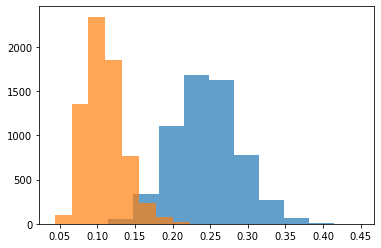

In [ ]:
plt.hist(avg1, alpha=0.7)
plt.hist(avg0, alpha=0.7)

# 4.Will these features work for different classes other than 0 and 1?

(array([  23.,  234.,  771., 1500., 1551., 1250.,  585.,  163.,   45.,
           9.]),
 array([ 59. ,  82.8, 106.6, 130.4, 154.2, 178. , 201.8, 225.6, 249.4,
        273.2, 297. ]),
 <a list of 10 Patch objects>)

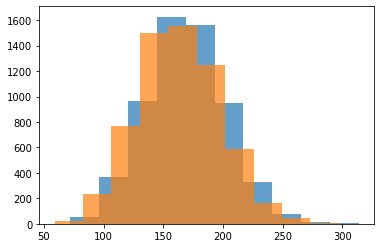

In [ ]:
# lets consider datasets of 2 and 3 and apply these features
no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]
sum2 = np.sum(no2>0, (1,2))
sum3 = np.sum(no3>0, (1,2))
plt.hist(sum2, alpha=0.7)
plt.hist(sum3, alpha=0.7)

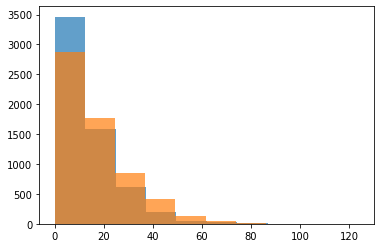

In [ ]:
hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])
  
plt.hist(hole2, alpha=0.7);
plt.hist(hole3, alpha=0.7);

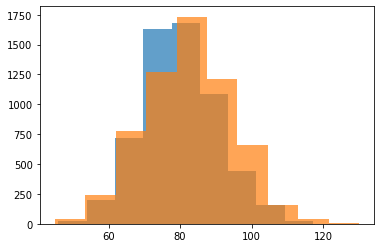

In [ ]:
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3= np.array([getBoundaryPixels(i).sum() for i in no3])

plt.hist(bound2, alpha=0.7);
plt.hist(bound3, alpha=0.7);

(array([  23.,  234.,  771., 1500., 1551., 1250.,  585.,  163.,   45.,
           9.]),
 array([0.0752551 , 0.10561224, 0.13596939, 0.16632653, 0.19668367,
        0.22704082, 0.25739796, 0.2877551 , 0.31811224, 0.34846939,
        0.37882653]),
 <a list of 10 Patch objects>)

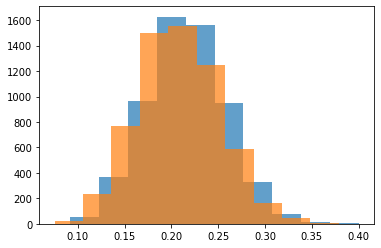

In [ ]:
avg2 = np.average(no2>0, (1,2))
avg3 = np.average(no3>0, (1,2))
plt.hist(avg2, alpha=0.7)
plt.hist(avg3, alpha=0.7)

# => Hence the above features won't work for classes other than 0 and 1

## 5.What will happen if we take more that two classes at a time?

# => collision might arises.

(array([  23.,  234.,  771., 1500., 1551., 1250.,  585.,  163.,   45.,
           9.]),
 array([0.0752551 , 0.10561224, 0.13596939, 0.16632653, 0.19668367,
        0.22704082, 0.25739796, 0.2877551 , 0.31811224, 0.34846939,
        0.37882653]),
 <a list of 10 Patch objects>)

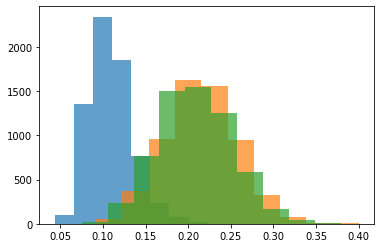

In [ ]:
avg1 = np.average(no1>0, (1,2))
avg2 = np.average(no2>0, (1,2))
avg3 = np.average(no3>0, (1,2))
plt.hist(avg1, alpha=0.7)
plt.hist(avg2, alpha=0.7)
plt.hist(avg3, alpha=0.7)

# iris dataset exploration

In [4]:
df = pd.read_csv('/content/sample_data/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


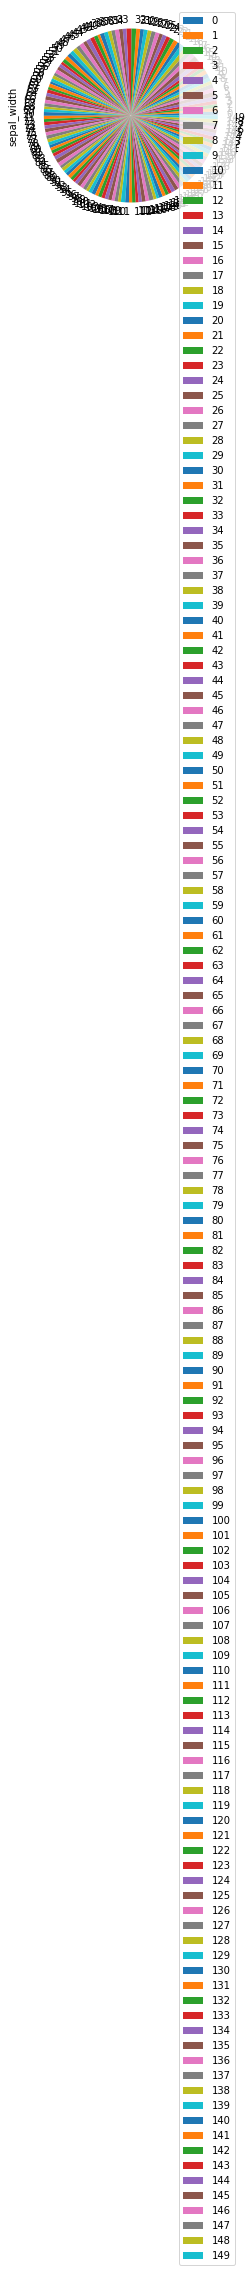

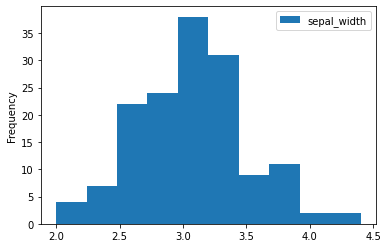

In [7]:
df.plot(kind ='pie', x='sepal_length', y='sepal_width')
df.plot(kind ='hist', x='sepal_length', y='sepal_width')

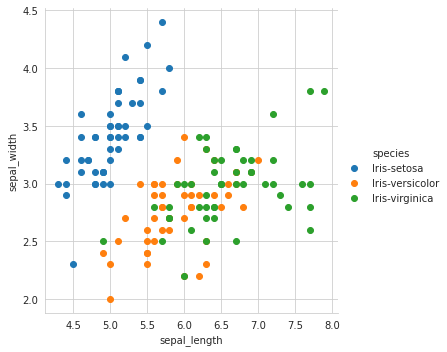

In [10]:
import seaborn as sns
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='species',height=5)\
   .map(plt.scatter,'sepal_length','sepal_width')\
   .add_legend()
plt.show();

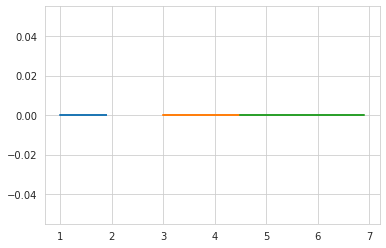

In [11]:
iris_setosa = df.loc[df['species'] == 'Iris-setosa']
iris_virginica = df.loc[df['species'] == 'Iris-virginica']
iris_versicolor = df.loc[df['species'] == 'Iris-versicolor']

#print(iris_sentosa['petal.length'])

plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

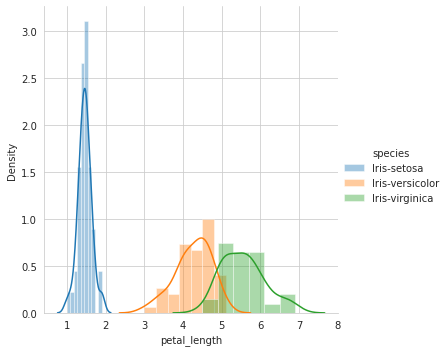

In [12]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'petal_length')\
   .add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

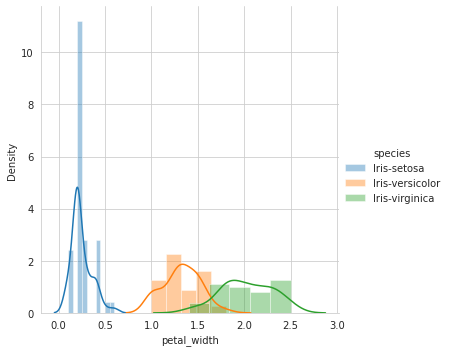

In [13]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'petal_width')\
   .add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

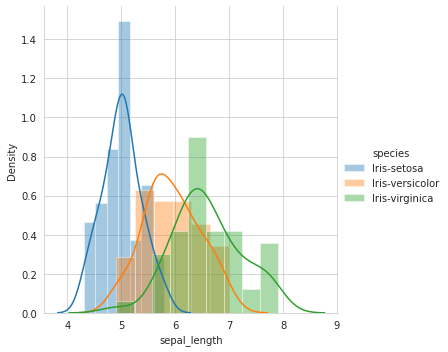

In [14]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'sepal_length')\
   .add_legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

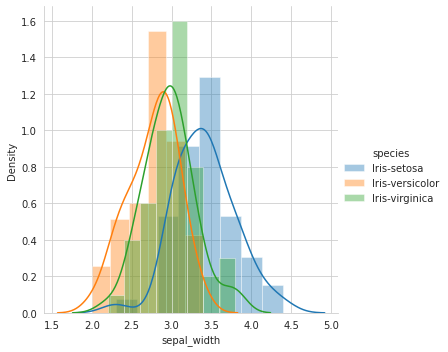

In [15]:
sns.FacetGrid(df, hue='species',height=5)\
   .map(sns.distplot, 'sepal_width')\
   .add_legend()

plt.show()

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


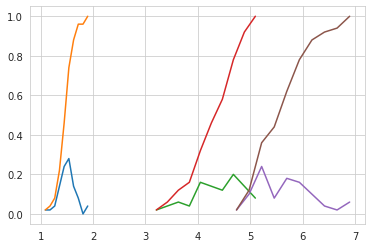

In [16]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# versicolor

counts, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# virginica

counts, bin_edges = np.histogram(iris_virginica['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()


## => there are two main features petal length and petal width
## => among them petal length separates the class efficiently